<center>
    
# Week 8 Assignment
    
</center>

<div style="text-align: right; width: 15%; margin-left: auto;">
    
Jon Cannaday <br>
DSC 630 <br>
Week 8 <br>
7/24/2024  

</div>


# Retail Sales
<br>

<div style="width: 100%; border-bottom: 1px solid black;"></div>

## Extract and Transform Data

   - ### Libraries


In [36]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

   - ### Data


In [2]:
path = 'C:\\Users\\Owner\\OneDrive\\Desktop\\DataScience\\2024_Summer_Predictive_Analysis\\'
file = "us_retail_sales.csv"
file_path = path + file
data = pd.DataFrame(pd.read_csv(file_path))

   - ### Data Overview


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    30 non-null     int64  
 1   JAN     30 non-null     int64  
 2   FEB     30 non-null     int64  
 3   MAR     30 non-null     int64  
 4   APR     30 non-null     int64  
 5   MAY     30 non-null     int64  
 6   JUN     30 non-null     int64  
 7   JUL     29 non-null     float64
 8   AUG     29 non-null     float64
 9   SEP     29 non-null     float64
 10  OCT     29 non-null     float64
 11  NOV     29 non-null     float64
 12  DEC     29 non-null     float64
dtypes: float64(6), int64(7)
memory usage: 3.2 KB


We are looking at a 30 row by 13 column dataset.

Nulls may be present for the Jul - Dec columns.

We will reformat the table to a tabular form.

In [4]:
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


   - ### Format Data


In [5]:
# Tabular
data_melted = pd.melt(data, id_vars=['YEAR'], var_name='Month', value_name='Value').fillna(0)

In [6]:
# Map the month names to numbers
month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

In [7]:
data_melted['Month_Num'] = data_melted['Month'].map(month_mapping)

In [8]:
data_melted['Day_Num'] = 1

In [9]:
data_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YEAR       360 non-null    int64  
 1   Month      360 non-null    object 
 2   Value      360 non-null    float64
 3   Month_Num  360 non-null    int64  
 4   Day_Num    360 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 14.2+ KB


In [10]:
data_melted['Date'] = pd.to_datetime(data_melted[['YEAR', 'Month_Num', 'Day_Num']].rename(
    columns={'YEAR': 'year', 'Month_Num': 'month', 'Day_Num': 'day'}
))

In [11]:
# Drop unnecessary columns
data_melted = data_melted.drop(columns=['YEAR', 'Month', 'Month_Num', 'Day_Num'])

In [12]:
data_melted

,Value,Date
0,146925.0,1992-01-01
1,157555.0,1993-01-01
2,167518.0,1994-01-01
3,182413.0,1995-01-01
4,189135.0,1996-01-01
...,...,...
355,433282.0,2017-12-01
356,434803.0,2018-12-01
357,458055.0,2019-12-01
358,484782.0,2020-12-01


Transformed the unpivoted data set to a tabular form.

# Plot the data with proper labeling and make some observations on the graph.

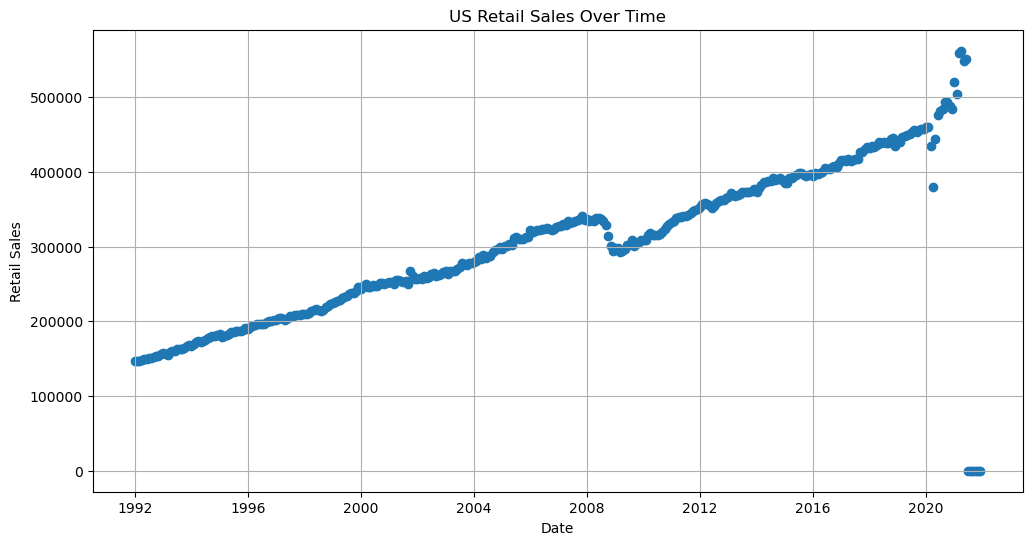

In [29]:
plt.figure(figsize=(12, 6))
plt.scatter(data_melted['Date'], data_melted['Value'], marker='o')
plt.title('US Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.grid(True)
plt.show()

We can see generally that the sales are increasing over time.

A drop in sales in 2008.

Potential outliers in 2020. This may be explained that at the time of this report it may have been early 2020 so the data did not exsist yet.

We will remove this data before running the model.

In [22]:
model_data = data_melted[data_melted['Value'] > 0]

# Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.


In [23]:
# split
X_train = np.array(train_data['Date'].map(pd.Timestamp.toordinal)).reshape(-1, 1)
y_train = train_data['Value']
X_test = np.array(test_data['Date'].map(pd.Timestamp.toordinal)).reshape(-1, 1)
y_test = test_data['Value']

# regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Use the training set to build a predictive model for the monthly retail sales.


In [24]:
X_train = np.array(train_data['Date'].map(pd.Timestamp.toordinal)).reshape(-1, 1)
y_train = train_data['Value']
X_test = np.array(test_data['Date'].map(pd.Timestamp.toordinal)).reshape(-1, 1)
y_test = test_data['Value']

# Use the model to predict the monthly retail sales on the last year of data.


         Date  Predicted_Sales
0  2020-01-31    445090.296397
1  2020-02-29    445922.117854
2  2020-03-31    446811.306309
3  2020-04-30    447671.811265
4  2020-05-31    448560.999719
5  2020-06-30    449421.504675
6  2020-07-31    450310.693130
7  2020-08-31    451199.881585
8  2020-09-30    452060.386540
9  2020-10-31    452949.574995
10 2020-11-30    453810.079951
11 2020-12-31    454699.268406


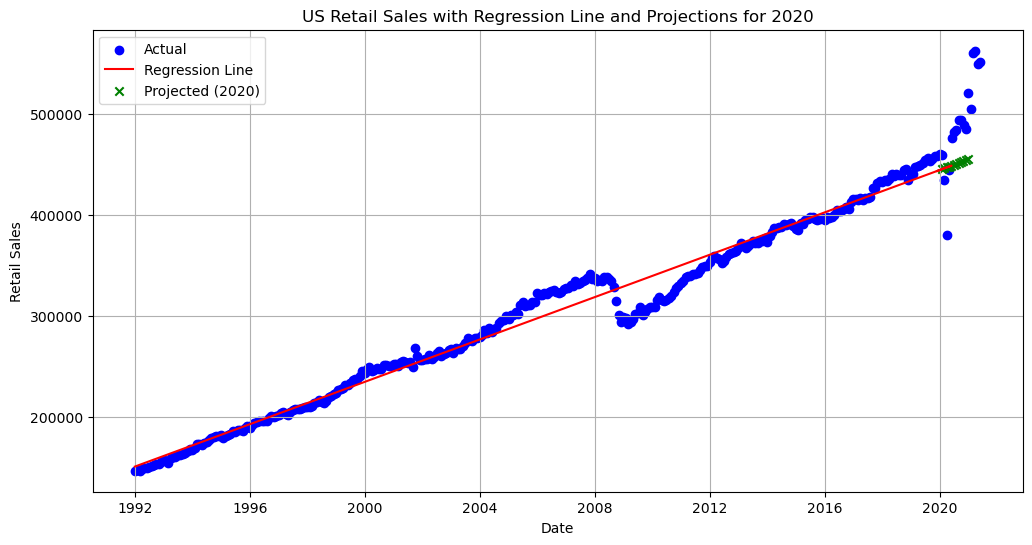

In [30]:
# Project all months of 2020 using the model
all_2020_dates = pd.date_range(start='2020-01-01', end='2020-12-31', freq='M')
all_2020_ordinal = np.array(all_2020_dates.map(pd.Timestamp.toordinal)).reshape(-1, 1)
all_2020_preds = model.predict(all_2020_ordinal)

# 2020 predictions
projection_df = pd.DataFrame({'Date': all_2020_dates, 'Predicted_Sales': all_2020_preds})
print(projection_df)

# Plot data regression and projected
plt.figure(figsize=(12, 6))
plt.scatter(model_data['Date'], model_data['Value'], label='Actual', color='blue', marker='o')
plt.plot(train_data['Date'], model.predict(X_train), label='Regression Line', color='red')
plt.scatter(all_2020_dates, all_2020_preds, label='Projected (2020)', color='green', marker='x')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.title('US Retail Sales with Regression Line and Projections for 2020')
plt.legend()
plt.grid(True)
plt.show()

Since we have monthly data we will see how each month does for the next year.

Red is the regression line.

blue is the actual data.

green is the predicted data.

# Report the RMSE of the model predictions on the test set.

In [31]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE on the test set: {rmse}")

RMSE on the test set: 66429.10224838037


# --------------------------------------------------------------------------------------------------------
# --- EXTRA --- 
# Time series forecast
# --------------------------------------------------------------------------------------------------------

# Model


In [39]:
# SARIMA model
model = SARIMAX(train_data['Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Run


In [40]:
# Forecast for the test period
forecast = model_fit.get_forecast(steps=len(test_data))
forecast_index = test_data.index
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Calculate RMSE
rmse = mean_squared_error(test_data['Value'], forecast_values, squared=False)
print(f"RMSE on the test set: {rmse}")

RMSE on the test set: 66644.6075374418


# Project


In [41]:
# Project the full year of 2020
forecast_full_2020 = model_fit.get_forecast(steps=12)
forecast_full_2020_values = forecast_full_2020.predicted_mean
forecast_full_2020_ci = forecast_full_2020.conf_int()
forecast_full_2020_index = pd.date_range(start='2020-01-01', end='2020-12-31', freq='M')

# Plot


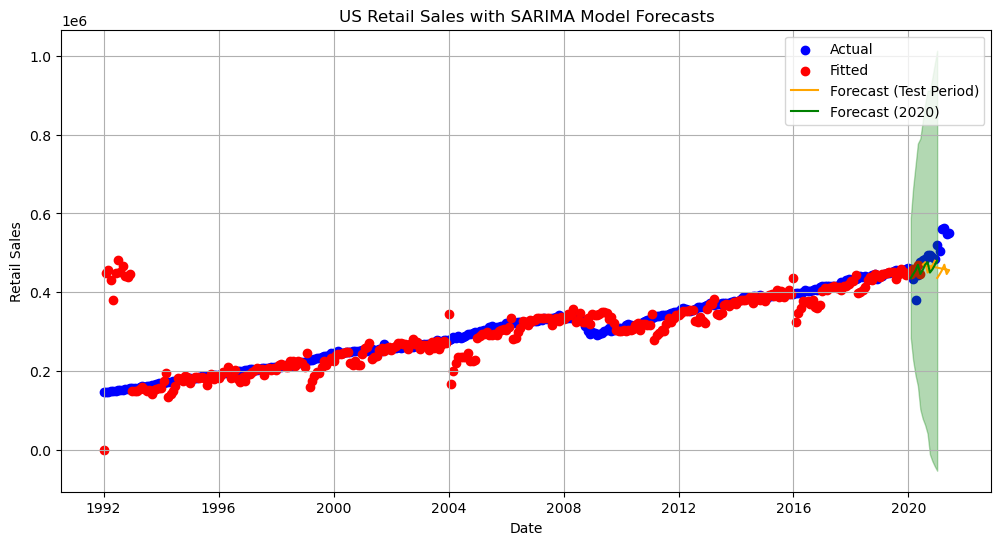

In [43]:
# Plot the data, fitted values, and projections
plt.figure(figsize=(12, 6))
plt.scatter(model_data.index, model_data['Value'], label='Actual', color='blue', marker='o')
plt.scatter(train_data.index, model_fit.fittedvalues, label='Fitted', color='red')
plt.plot(forecast_index, forecast_values, label='Forecast (Test Period)', color='orange')
plt.plot(forecast_full_2020_index, forecast_full_2020_values, label='Forecast (2020)', color='green')
plt.fill_between(forecast_full_2020_index, forecast_full_2020_ci.iloc[:, 0],
                 forecast_full_2020_ci.iloc[:, 1], color='green', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.title('US Retail Sales with SARIMA Model Forecasts')
plt.legend()
plt.grid(True)
plt.show()